Docker/Singularity containers are the preferable way to run PyNets, but for demonstration purposes, let's just begin with installation in a virtual environment and run the workflow manually on some example data. The scope of this particular tutorial will only cover single-subject workflows. Later tutorials will demonstrate how you can deploy PyNets for group analysis and across entire BIDS datasets in a single command-line interface (CLI) call.

# Installation

In [1]:
%%bash
%%capture

# Start a virtual environment and install some dependencies for our lesson.
pip install virtualenv --user
mkdir ~/virtualenvironment 2>/dev/null
virtualenv ~/virtualenvironment/pynets
cd ~/virtualenvironment/pynets/bin
source activate
./pip3 install -U gdown pynets==0.9.994 fury # for downloading data, running pynets, and some 3d viz

# For macs, download this link for fsleyes:
wget https://fsl.fmrib.ox.ac.uk/fsldownloads/fsleyes/FSLeyes-latest-macos.tar.gz #for 2d viz
#rm -rf ~/virtualenvironment/FSLeyes.app
tar -xzvf FSLeyes-latest-macos.tar.gz -C ~/virtualenvironment
# For Linux, downnload the appropriate precompiled build from https://fsl.fmrib.ox.ac.uk/fsl/fslwiki/FSLeyes


Using base prefix '/usr/local/anaconda3'
New python executable in /Users/derekpisner/virtualenvironment/pynets/bin/python
Installing setuptools, pip, wheel...
done.
Processing /Users/derekpisner/Library/Caches/pip/wheels/ac/0f/65/f8898ba51a103158b41f418d2a37cc928471624397da3af2f4/gdown-3.11.1-py3-none-any.whl
  Using cached pynets-0.9.994-py2.py3-none-any.whl (41.2 MB)
  Using cached fury-0.5.1-py3-none-any.whl (245 kB)
  Using cached six-1.15.0-py2.py3-none-any.whl (10 kB)
  Using cached requests-2.24.0-py2.py3-none-any.whl (61 kB)
  Using cached tqdm-4.47.0-py2.py3-none-any.whl (66 kB)
  Using cached filelock-3.0.12-py3-none-any.whl (7.6 kB)
  Using cached indexed_gzip-1.2.0-cp37-cp37m-macosx_10_9_x86_64.whl (546 kB)
  Using cached deepbrain-0.1-py3-none-any.whl (677 kB)
  Using cached templateflow-0.6.2-py3-none-any.whl (197 kB)
Processing /Users/derekpisner/Library/Caches/pip/wheels/44/e6/b8/4efaab31158e9e9ca9ed80b11f6b11130bac9a9672b3cbbeaf/networkx-2.3-py2.py3-none-any.whl
  Usin

--2020-06-30 13:04:38--  https://fsl.fmrib.ox.ac.uk/fsldownloads/fsleyes/FSLeyes-latest-macos.tar.gz
Resolving fsl.fmrib.ox.ac.uk (fsl.fmrib.ox.ac.uk)... 129.67.248.65
Connecting to fsl.fmrib.ox.ac.uk (fsl.fmrib.ox.ac.uk)|129.67.248.65|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 378058752 (361M) [application/x-gzip]
Saving to: ‘FSLeyes-latest-macos.tar.gz’

     0K .......... .......... .......... .......... ..........  0%  212K 29m3s
    50K .......... .......... .......... .......... ..........  0%  425K 21m45s
   100K .......... .......... .......... .......... ..........  0% 13.6M 14m39s
   150K .......... .......... .......... .......... ..........  0%  474K 14m13s
   200K .......... .......... .......... .......... ..........  0% 3.88M 11m41s
   250K .......... .......... .......... .......... ..........  0% 13.6M 9m49s
   300K .......... .......... .......... .......... ..........  0%  499K 10m10s
   350K .......... .......... .......... .......... 

# Fetch sample preprocessed data

And now we can download a minimal dataset from OASIS that includes preprocessed, multimodal fMRI and dMRI data.

In [2]:
%%bash
%%capture
## Normally, we could just use a dataset from datalad or from s3, which can be downloaded automatically if 
## your AWS credentials are properly configured. See `pynets_cloud` CLI , with examples here: 
## https://pynets.readthedocs.io/en/latest/usage.html#quickstart
## But to get a sufficiently versatile and preprocessed dataset of multimodal dMRI and rsfMRI data, 
## we draw from a minimal example publicly hosted elsewhere for the sake of this demonstration.

if  [ -d ~/Downloads/.pynets ]; then
    rm -rf ~/Downloads/.pynets/test_oasis*
else
    mkdir ~/Downloads/.pynets
fi

if  [ ! -f ~/Downloads/.pynets/test_oasis.tar.gz ]; then
    cd ~/Downloads/.pynets
    gdown https://drive.google.com/uc?id=1beEoc_Pdk6OBDYc80mBDTvUhcUny9Gu3 -O ~/Downloads/.pynets/test_oasis.tar.gz
fi
cd ~/Downloads/.pynets
mkdir ~/Downloads/.pynets/derivatives/sub-OAS31172 2>/dev/null
tar -xzvf test_oasis.tar.gz -C derivatives/sub-OAS31172

Downloading...
From: https://drive.google.com/uc?id=1beEoc_Pdk6OBDYc80mBDTvUhcUny9Gu3
To: /Users/derekpisner/Downloads/.pynets/test_oasis.tar.gz
230MB [00:22, 11.5MB/s]
x ses-d0407/func/sub-OAS31172_ses-d0407_task-rest_run-01_bold.nii.gz
x ses-d0407/anat/sub-OAS31172_ses-d0407_T2w.nii.gz
x ses-d1717/dwi/sub-OAS31172_ses-d1717_run-02_dwi.bval
x ses-d1717/swi/sub-OAS31172_ses-d1717_part-phase_GRE.json
x ses-d0407/anat/sub-OAS31172_ses-d0407_acq-TSE_T2w.json
x ses-d1717/dwi/sub-OAS31172_ses-d1717_run-02_dwi.bvec
x ses-d1717/swi/sub-OAS31172_ses-d1717_minIP.json
x ses-d1717/swi/sub-OAS31172_ses-d1717_swi.nii.gz
x ses-d1717/dataset_description.json
x ses-d0407/func/sub-OAS31172_ses-d0407_task-rest_run-02_bold.json
x ses-d1717/dwi/sub-OAS31172_ses-d1717_run-01_dwi.bval
x ses-d1717/swi/sub-OAS31172_ses-d1717_part-mag_GRE.nii.gz
x ses-d1717/dwi/sub-OAS31172_ses-d1717_run-01_dwi.bvec
x ses-d1717/func/sub-OAS31172_ses-d1717_task-rest_run-01_bold.json
x ses-d1717/anat/sub-OAS31172_ses-d1717_T2sta

# Functional Connectometry

*Note: Depending on the CPU/memory resources available to this jupyter notebook, the following commands may take anywhere between 10 minutes and several hours to run.

In [ ]:
%%bash
%%capture
# Get the absolute paths to files and directories we will use. The CLI's in PyNets do NOT accept relative paths.
dir=~/Downloads/.pynets
abs_dir=`echo "$(dirname $dir)"`

# Now we create an output directory for the derivatives of the pipeline (if one doesn't exist already).
mkdir ~/Downloads/.pynets/output 2>/dev/null

# And now we construct a command-line call for a single subject from the data we just downloaded.
# Namely, for run 1 of session d0407 from subject OAS31172, lets sample an ensemble of 96 connectome estimates (2 models x 6 thresholds x 2 smoothing values x 2 high-pass filter thresholds x 2 atlases x 2 time-series extraction methods). 
~/virtualenvironment/pynets/bin/pynets "$abs_dir"/.pynets/outputs -mod 'partcorr' 'corr' -min_thr 0.20 -max_thr 0.80 -step_thr 0.10 -sm 0 4 -hp 0 0.028 -a 'BrainnetomeAtlasFan2016' 'DesikanKlein2012' -es 'mean' 'variance' -anat "$abs_dir"/.pynets/derivatives/sub-OAS31172/ses-d0407/anat/sub-OAS31172_ses-d0407_run-01_T1w.nii.gz -func "$abs_dir"/.pynets/derivatives/sub-OAS31172/ses-d0407/func/sub-OAS31172_ses-d0407_task-rest_run-01_bold.nii.gz -id OAS31172_d0407_1 -plug 'MultiProc' -work '/tmp/pynets_work' -mst -plt 2>functional_connectometry_log.txt


# Viewing outputs

In [ ]:
%%bash
cd ~/Downloads/.pynets/outputs/sub-OAS31172/ses-d0407/func
ls

tree

Lets do a bit of quality-control to ensure, for example, that the inverse warping of the Desikan Klein atlas from template-space to native T1w anatomical space is valid.

In [2]:
%%bash
t1w_image=`ls /tmp/pynets_work/*/*/meta_wf_*/fmri_connectometry*/register_node/reg/imgs/*t1w_brain.nii.gz | head -1`
atlas_in_t1w_image=`ls /tmp/pynets_work/*_wf_single_subject_fmri*/wf_single_*/meta_wf_*/fmri_connectometry_*/_atlas_DesikanKlein2012/register_atlas_node/atlas_DesikanKlein2012/*_gm.nii.gz | head -1`

~/virtualenvironment/FSLeyes.app/Contents/*/fsleyes "$t1w_image" "$atlas_in_t1w_image" -cm 'random' &


/Users/derekpisner/virtualenvironment/FSLeyes.app/Contents/Resources/lib/python36.zip/fsleyes/__init__.py:252: MatplotlibDeprecationWarning: 
The MATPLOTLIBDATA environment variable was deprecated in Matplotlib 3.1 and will be removed in 3.3.


The below multiplot depicts distributions of average graph topological metrics, calculated using Area-Under-the-Curve (AUC) across our window of multiple thresholds, for the ensemble of 96 connectomes sampled. As you can visually discern, topology varies considerably across estimates.

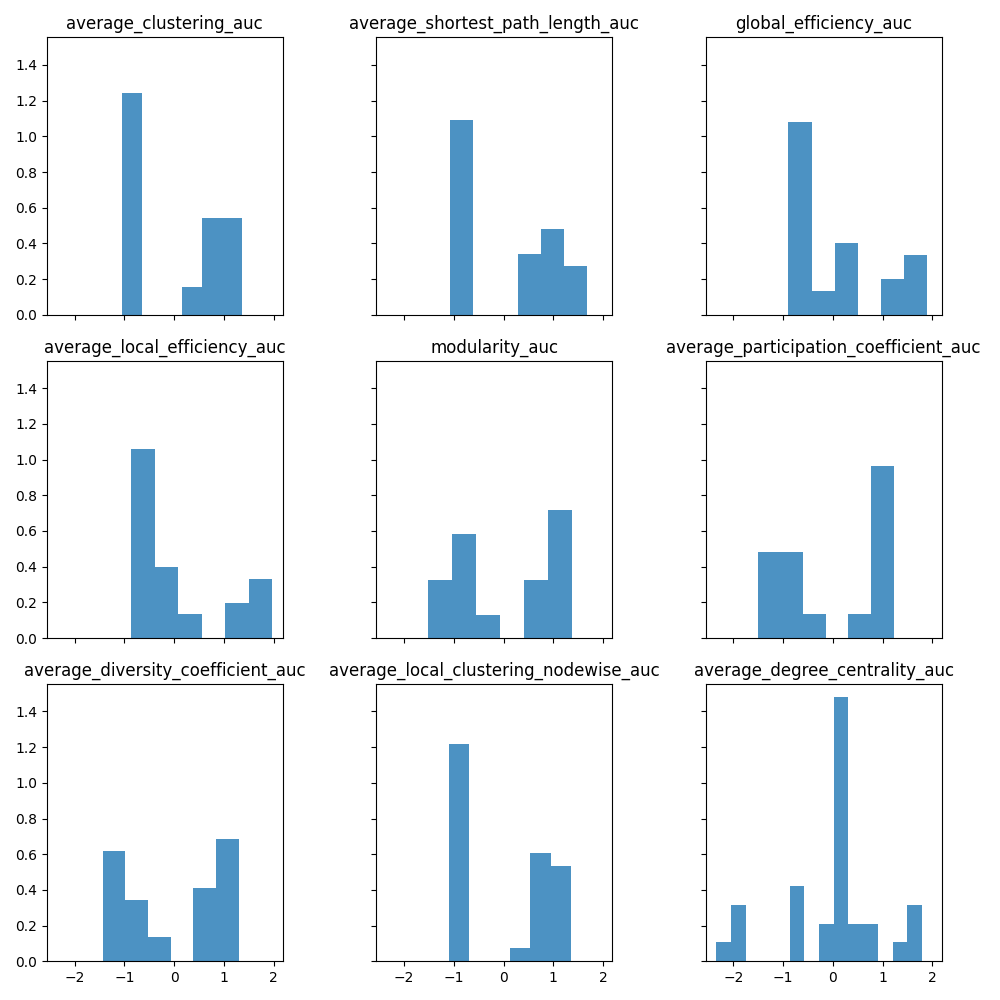

In [3]:
import glob
from IPython.display import Image
Image(filename=glob.glob('/Users/*/Downloads/.pynets/outputs/sub-OAS31172/ses-d0407/func/mean_global_topology_distribution_multiplot.png')[0])


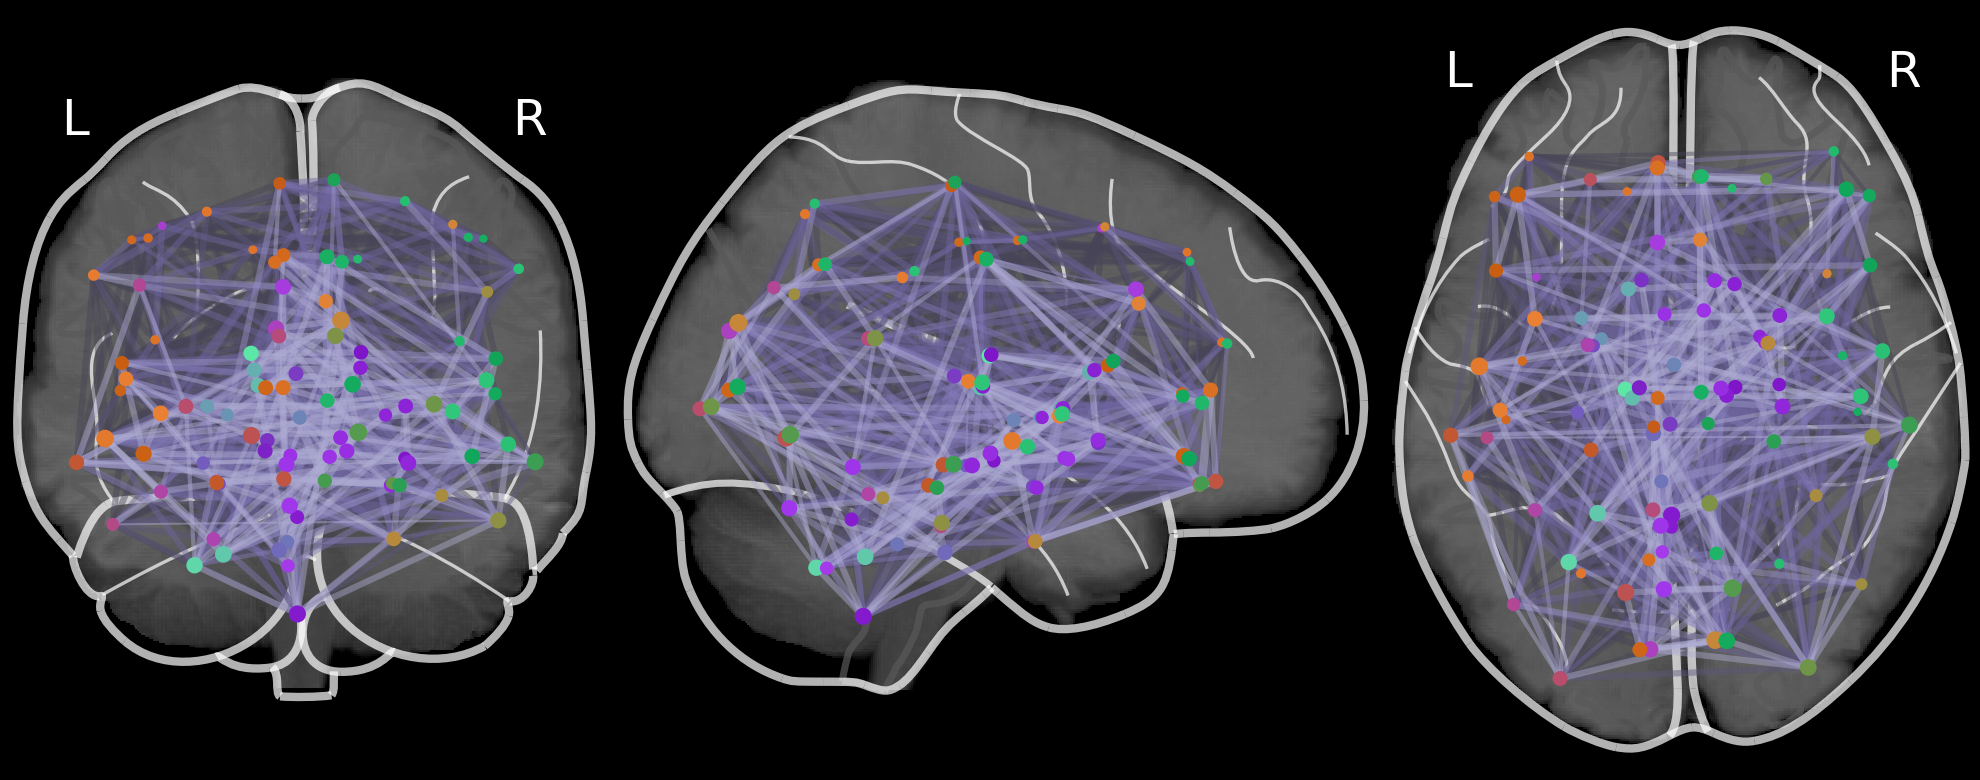

In [4]:
from IPython.display import Image
Image(filename=glob.glob('/Users/*/Downloads/.pynets/outputs/sub-OAS31172/ses-d0407/func/DesikanKlein2012/figures/sub-OAS31172_ses-d0407_run-1_modality-func_est-partcorr_nodetype-parc_smooth-4fwhm_hpass-0.028Hz_extract-variance_thr-0.2_glass_viz.png')[0]) 


Above is a glass brain depiction of all regions of the Desikan Klein 2012 atlas using a partial correlation estimator, 4 fwhm smoothing, 0.028Hz high-pass filter, based on variance of the node-extracted time-series, with 20% post-hoc thresholding using the Minimum-Spanning Tree (MST) method. 

In the visualization, node size conveys the level of node importance (smaller is lower eigenvector centrality) and node color corresponds to hierarchical Louvain community affiliation (5 distinct communities found).

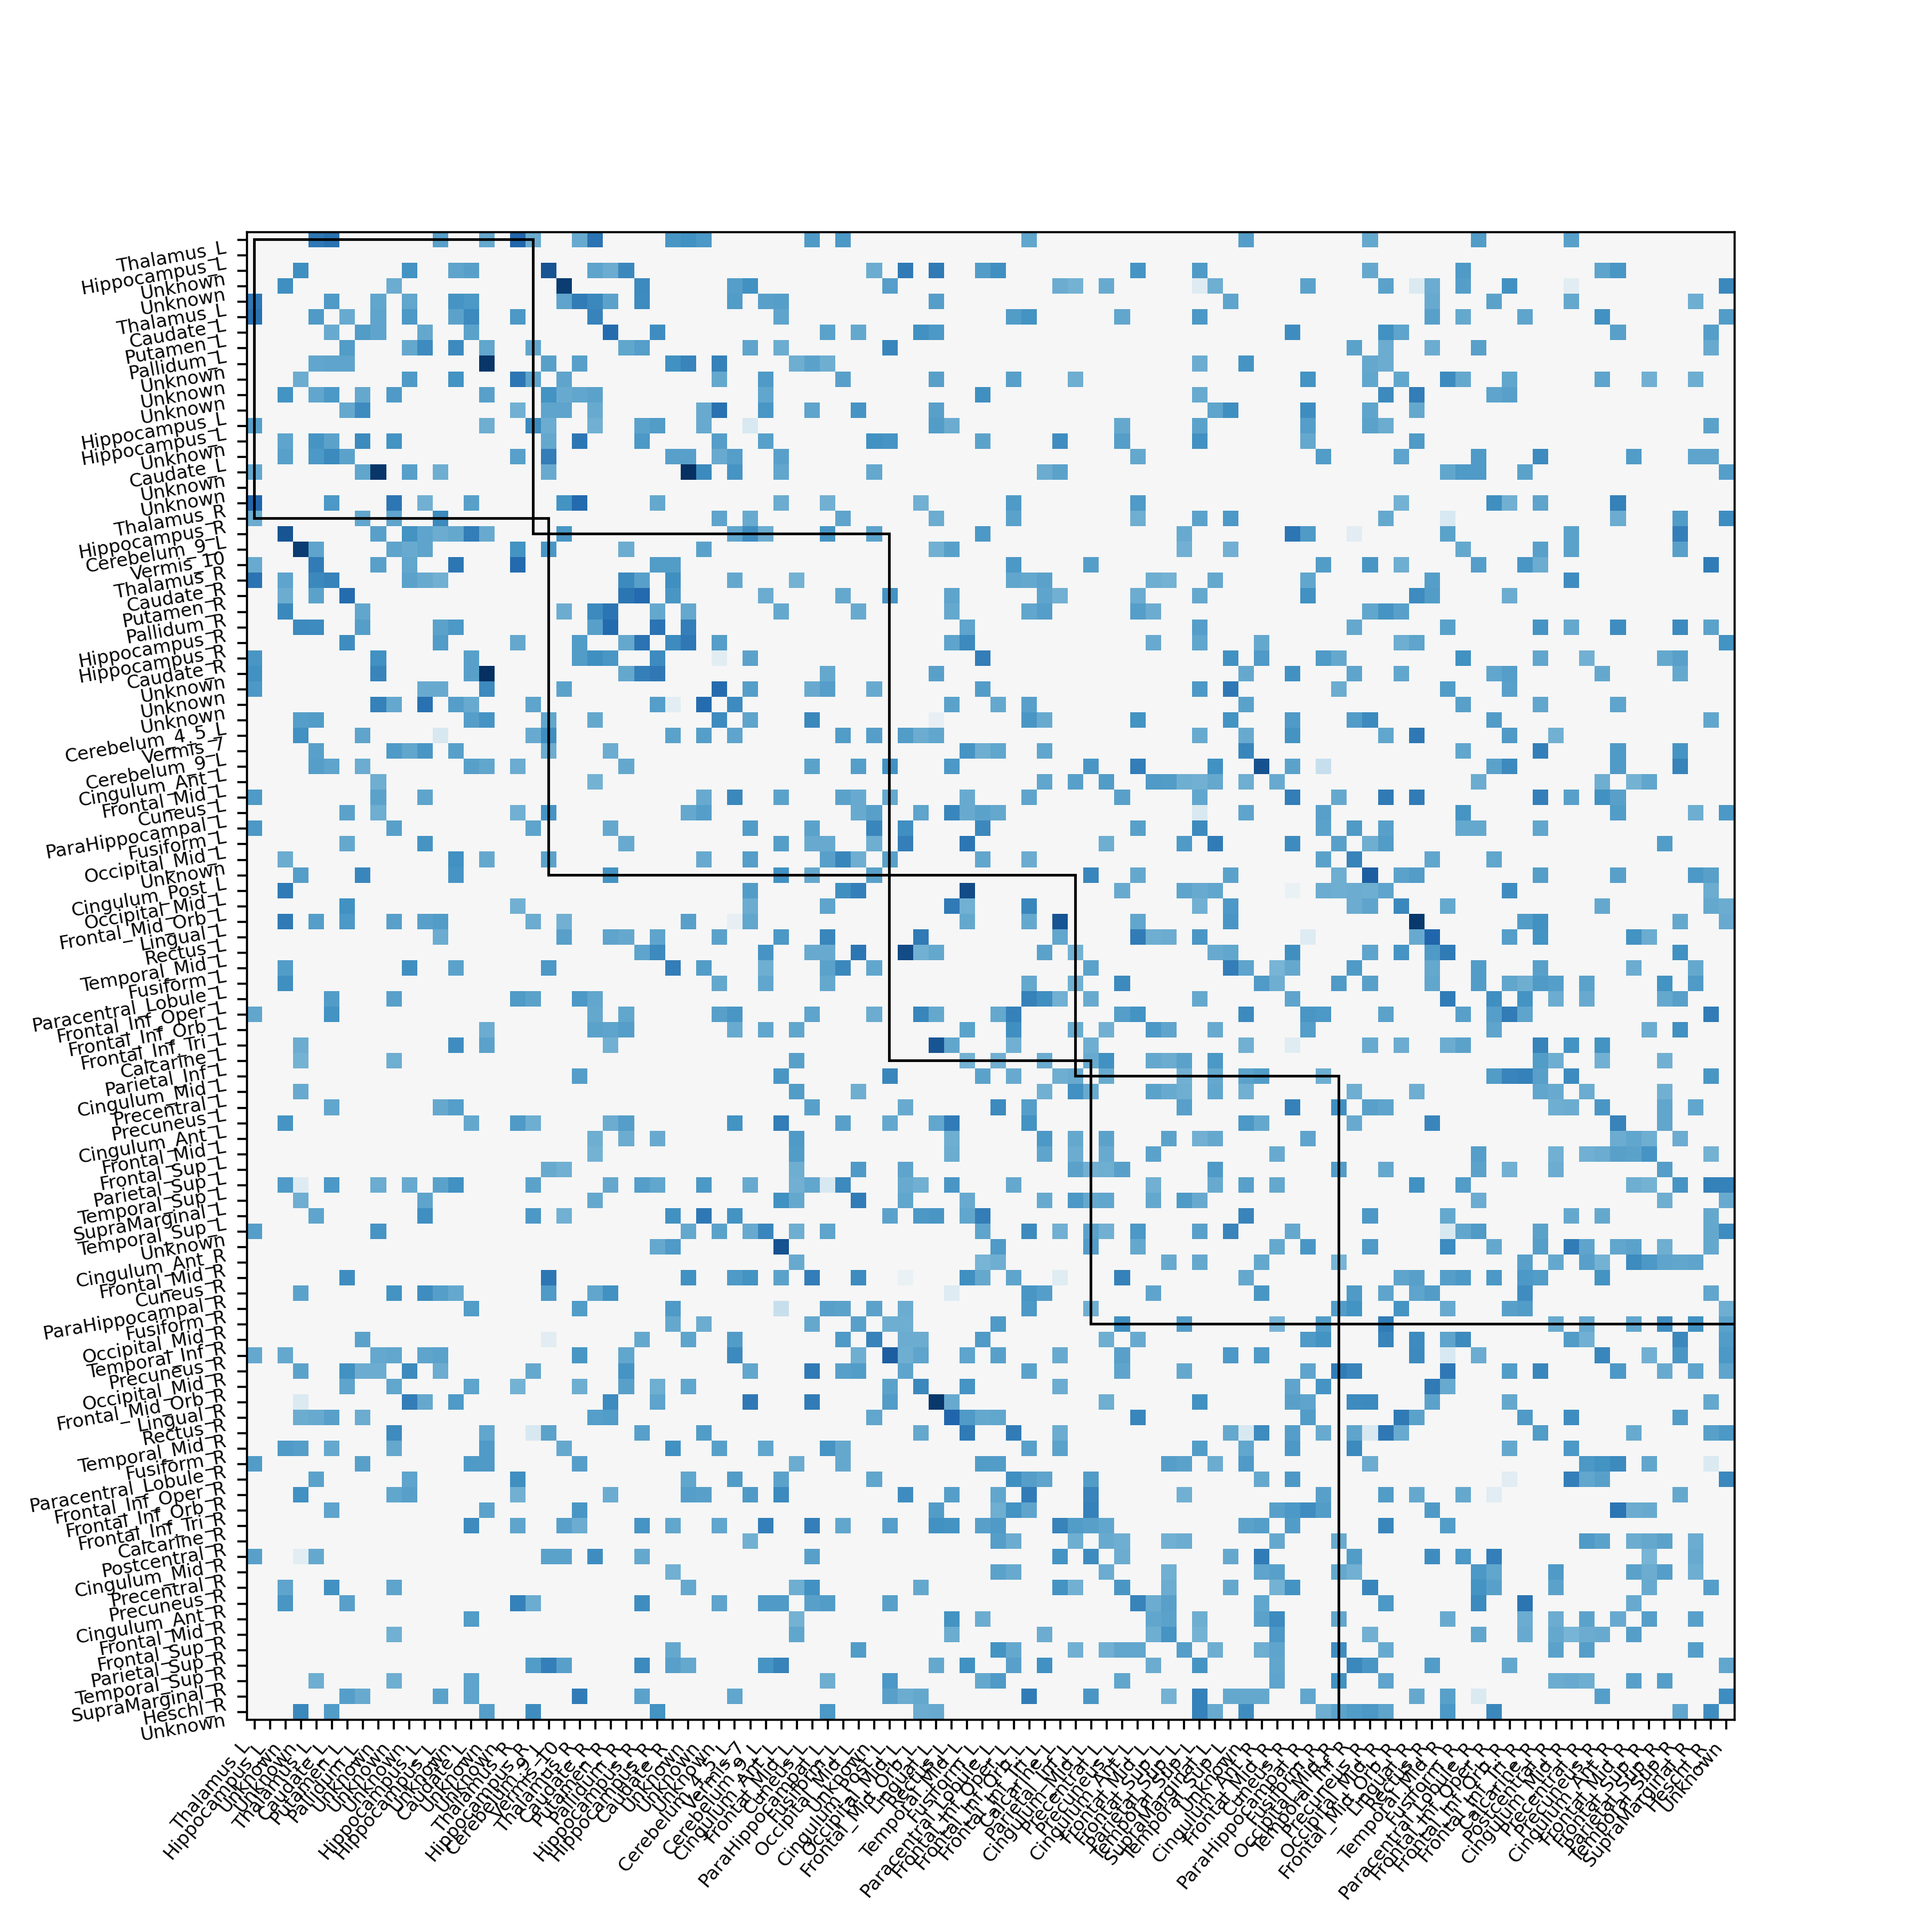

In [5]:
Image(filename=glob.glob('/Users/*/Downloads/.pynets/outputs/sub-OAS31172/ses-d0407/func/DesikanKlein2012/figures/sub-OAS31172_ses-d0407_run-1_modality-func_est-partcorr_nodetype-parc_smooth-4fwhm_hpass-0.028Hz_extract-variance__thr-0.2_adj_mat_comm.png')[0]) 


The above adjacency matrix depicts a single connectome estimate, with community affiliation. But we could also look at the mean connectome (i.e. across all 96 estimates) -- what we might from here on out refer to as an **omnetome** as well:

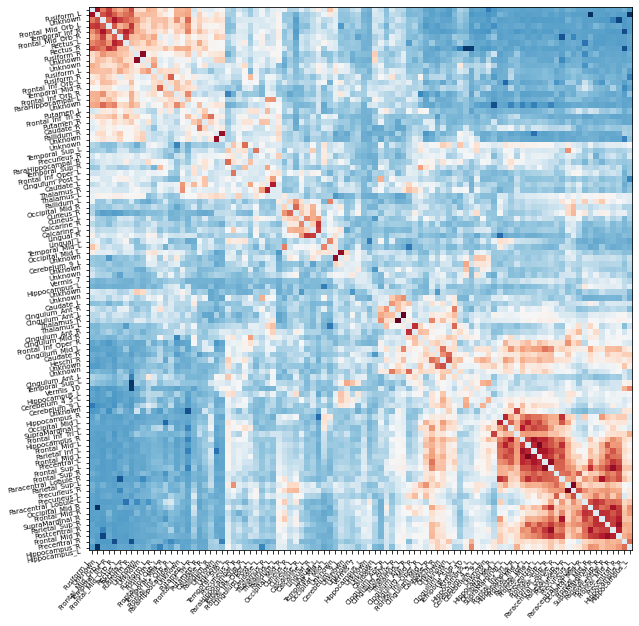

In [15]:
import pickle
import numpy as np
from matplotlib import pyplot as plt
from nilearn.plotting import plot_matrix
from pynets.core.thresholding import standardize
labels_path = glob.glob('/Users/*/Downloads/.pynets/outputs/sub-OAS31172/ses-d0407/func/DesikanKlein2012/nodes/*labels.pkl')[0]

with open(labels_path, 'rb') as f:
    labels = pickle.load(f)
    
mats = [np.load(i) for i in glob.glob('/Users/*/Downloads/.pynets/outputs/sub-OAS31172/ses-d0407/func/DesikanKlein2012/graphs/*.npy')]

mean_mat = standardize(np.mean(mats, axis=0))

plot_matrix(
    mean_mat,
    figure=(10, 10),
    labels=labels,
    vmax=np.abs(np.max(mean_mat)),
    vmin=0,
    reorder="average",
    auto_fit=True,
    grid=False,
    colorbar=False,
    cmap='RdBu_r',
)
plt.show()

As you can see, we get a much more information-rich graph. This graph, unlike the first, now represents a new *distribution* of connectomes, that, by virtue of its plurality of views, more exhaustively samples from the true *population* of networks in this individual that may exhibit connectivity, across the whole brain as a region of interest, at any point in time during the course of the 5-10 minute resting-state time-series.

# Collecting Outputs
Now, we explored the outputs of our connectome ensemble visually, but let's take a closer look at the actual topological data. To do this, we run another workflow using the `pynets_collect` CLI.

In [9]:
%%bash

dir=~/Downloads/.pynets
abs_dir=`echo "$(dirname $dir)"`
pynets_collect -basedir "$abs_dir"/.pynets/outputs



PyNets Version:
0.9.994


200630-16:29:54,851 nipype.workflow INFO:
	 Generated workflow graph: /tmp/work/pynets_out_collection/load_pd_dfs/graph.png (graph2use=colored, simple_form=True).

Running with {'n_procs': 4, 'memory_gb': 8, 'scheduler': 'mem_thread'}

200630-16:29:56,844 nipype.workflow INFO:
	 Workflow load_pd_dfs settings: ['check', 'execution', 'logging', 'monitoring']
200630-16:29:56,861 nipype.workflow INFO:
	 Running in parallel.
200630-16:29:56,867 nipype.workflow INFO:
	 [MultiProc] Running 0 tasks, and 1 jobs ready. Free memory (GB): 8.00/8.00, Free processors: 4/4.
200630-16:29:57,867 nipype.workflow INFO:
	 [MultiProc] Running 1 tasks, and 0 jobs ready. Free memory (GB): 7.80/8.00, Free processors: 3/4.
                     Currently running:
                       * load_pd_dfs.build_subject_dict_node
200630-16:30:01,807 nipype.workflow INFO:
	 [Node] Setting-up "load_pd_dfs.build_subject_dict_node" in "/private/tmp/work/pynets_out_collection/load_pd_dfs/_sub_su

In [ ]:
import pathlib
from pathlib import Path
import pandas as pd

# Now we can load a dataframe of summary topological graph metrics for the run for this particular subject.
# Note that if we were to sample connectomes from multiple subjects, the previous pynets_collect CLI would 
# simply append new rows to the dataframe per subject run.
p = str(Path('~').expanduser()) + '/Downloads/.pynets/outputs/all_subs_neat.csv'
df = pd.read_csv(p, index_col=False)
df

# Structural Connectometry

In [ ]:
%%bash
# Again, get the absolute paths to files and directories we will use. 
# The CLI's in PyNets do NOT accept relative paths.
dir=~/Downloads/.pynets
abs_dir=`echo "$(dirname $dir)"`

# And now we construct a command-line call for the same subject, but 
# using their dMRI data instead. This time, we'll also use a higher 
# resolution of 1mm since we are working with microstructure data.
# Namely, for run 1 of session d0407 from subject OAS31172, lets 
# sample an ensemble of 48 connectome estimates (2 diffusion model 
# types x 6 thresholds x 1 direction-getting methods x 2 minimum 
# streamline length thresholds x 2 atlases. 

~/virtualenvironment/pynets/bin/pynets "$abs_dir"/.pynets/outputs -mod 'ten' 'csa' -min_thr 0.20 -max_thr 0.80 -step_thr 0.10 -dg 'det' -ml 20 0 -a 'BrainnetomeAtlasFan2016' 'DesikanKlein2012' -anat ""$abs_dir"/.pynets/derivatives/sub-OAS31172/ses-d0407/anat/sub-OAS31172_ses-d0407_run-01_T1w.nii.gz" -dwi ""$abs_dir"/.pynets/derivatives/sub-OAS31172/ses-d0407/dwi/sub-OAS31172_ses-d0407_dwi.nii.gz" -bval ""$abs_dir"/.pynets/derivatives/sub-OAS31172/ses-d0407/dwi/sub-OAS31172_ses-d0407_dwi.bval" -bvec ""$abs_dir"/.pynets/derivatives/sub-OAS31172/ses-d0407/dwi/sub-OAS31172_ses-d0407_dwi.bvec" -id OAS31172_d0407_1 -plug 'MultiProc' -work '/tmp/pynets_work' -mst -plt -vox '1mm'


# Viewing outputs

In [1]:
%%bash
cd ~/Downloads/.pynets/outputs/sub-OAS31172/ses-d0407/dwi
ls
​
tree

BrainnetomeAtlasFan2016
DesikanKlein2012
reg
summary
t1w_brain_mask.nii.gz
.
├── BrainnetomeAtlasFan2016
│   ├── BrainnetomeAtlasFan2016_tmp_reor-RAS_res-1mm.nii.gz
│   ├── BrainnetomeAtlasFan2016_tmp_reor-RAS_res-2mm.nii.gz
│   ├── figures
│   │   ├── OAS31172_d0407_1_modality-dwi_est-csa_nodetype-parc_samples-10000streams_tt-local_dg-det_ml-0_thr-0.2_adj_mat.png
│   │   ├── OAS31172_d0407_1_modality-dwi_est-csa_nodetype-parc_samples-10000streams_tt-local_dg-det_ml-0_thr-0.2_adj_mat_comm.png
│   │   ├── OAS31172_d0407_1_modality-dwi_est-csa_nodetype-parc_samples-10000streams_tt-local_dg-det_ml-0_thr-0.2_glass_viz.png
│   │   ├── OAS31172_d0407_1_modality-dwi_est-csa_nodetype-parc_samples-10000streams_tt-local_dg-det_ml-0_thr-0.3_adj_mat.png
│   │   ├── OAS31172_d0407_1_modality-dwi_est-csa_nodetype-parc_samples-10000streams_tt-local_dg-det_ml-0_thr-0.3_adj_mat_comm.png
│   │   ├── OAS31172_d0407_1_modality-dwi_est-csa_nodetype-parc_samples-10000streams_tt-local_dg-det_ml-0_thr-0.3_gla

bash: line 3: ​: command not found


Lets do a bit of quality-control to ensure, for example, that the inverse warping of the Desikan Klein atlas from template-space to native DWI anatomical space is valid.

In [5]:
%%bash
t1w_dwi_image=`ls /tmp/pynets_work/*/*/meta_wf_*/dmri_connectometry*/register_node/dmri_reg/reg/imgs/t1w_in_dwi.nii.gz | head -1`
atlas_in_t1w_dwi_image=`ls /tmp/pynets_work/*_wf_single_subject_dmri*/wf_single_*/meta_wf_*/dmri_connectometry_*/_atlas_DesikanKlein2012/register_atlas_node/atlas_DesikanKlein2012/DesikanKlein2012_dwi_track.nii.gz | head -1`
density_map=`ls ~/Downloads/.pynets/outputs/sub-OAS31172/ses-d0407/dwi/DesikanKlein2012/tractography/*.nii.gz | head -1`

~/virtualenvironment/FSLeyes.app/Contents/*/fsleyes "$t1w_dwi_image" "$atlas_in_t1w_dwi_image" -cm 'random' "$density_map" &

/Users/derekpisner/virtualenvironment/FSLeyes.app/Contents/Resources/lib/python36.zip/fsleyes/__init__.py:252: MatplotlibDeprecationWarning: 
The MATPLOTLIBDATA environment variable was deprecated in Matplotlib 3.1 and will be removed in 3.3.


The below multiplot depicts distributions of average graph topological metrics, calculated using Area-Under-the-Curve (AUC) across our window of multiple thresholds, for the ensemble of 48 connectomes sampled. As you can visually discern, topology varies considerably across estimates.

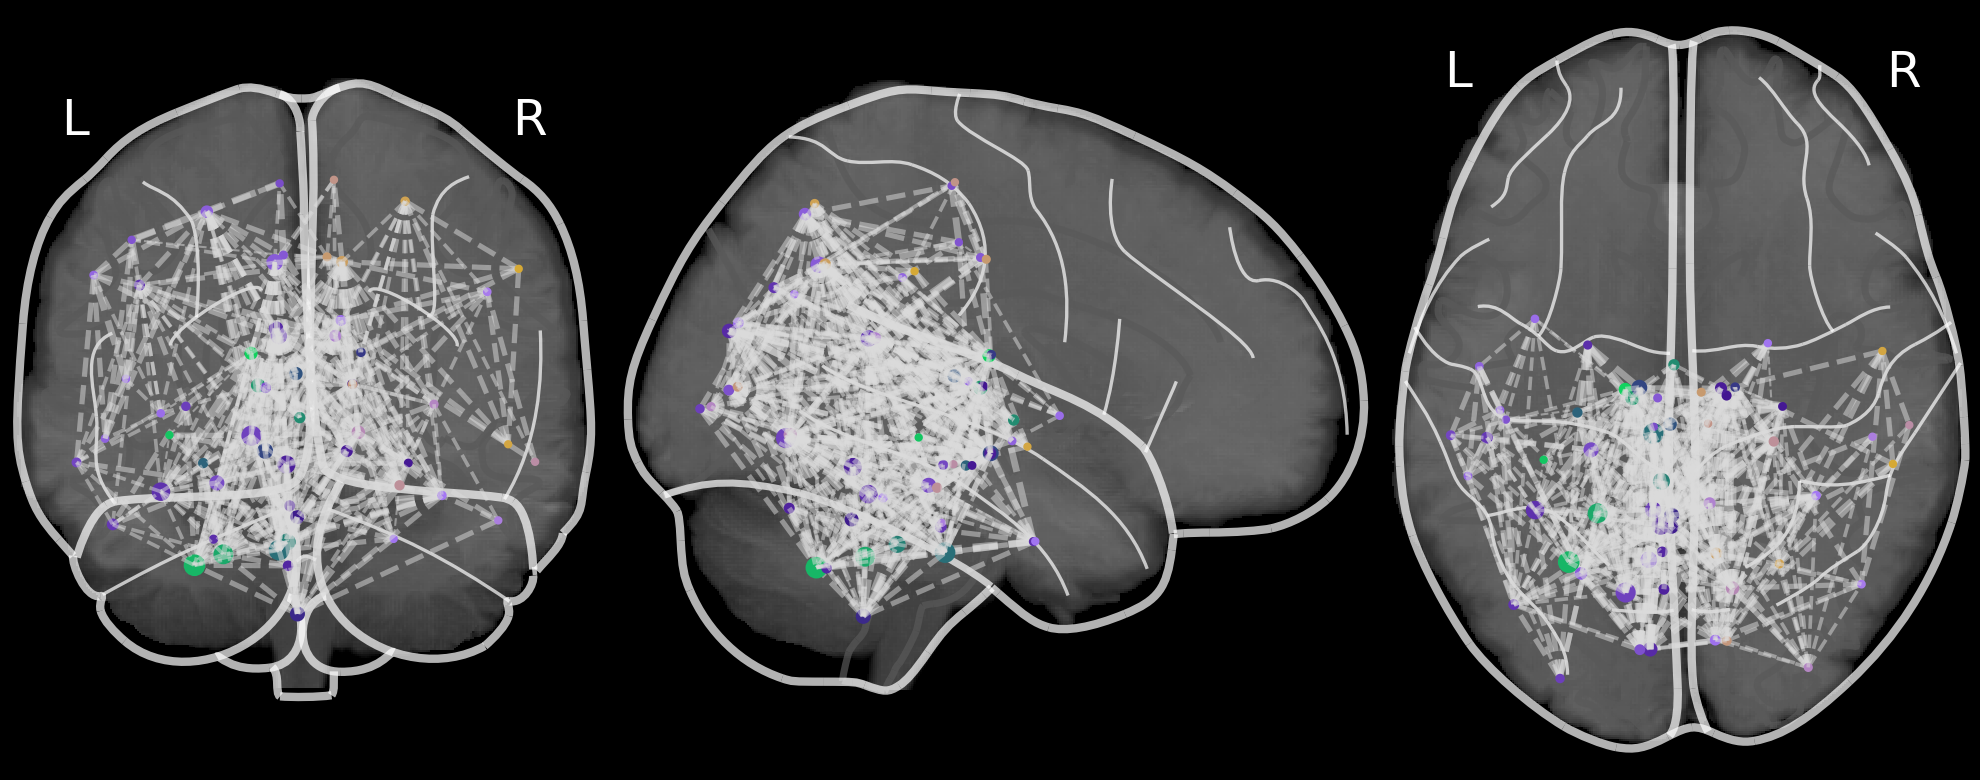

In [9]:
import glob
from IPython.display import Image
Image(filename=glob.glob('/Users/*/Downloads/.pynets/outputs/sub-OAS31172/ses-d0407/dwi/DesikanKlein2012/figures/OAS31172_d0407_1_modality-dwi_est-ten_nodetype-parc_samples-10000streams_tt-local_dg-det_ml-20_thr-0.8_glass_viz.png')[0]) 

Above is a glass brain depiction of regions of the Desikan Klein 2012 atlas using a tensor model estimator of diffusion, deterministic tractography, a minimum fiber length threshold of 20, with 80% post-hoc thresholding using the Minimum-Spanning Tree (MST) method.
Again, un the visualization, node size conveys the level of node importance (smaller is lower eigenvector centrality) and node color corresponds to hierarchical Louvain community affiliation (only two distinct communities found). Unlike in the functional case, however, edges are here depicted with dotted white lines to differentiate them from functional edges, which carry a different meaning.

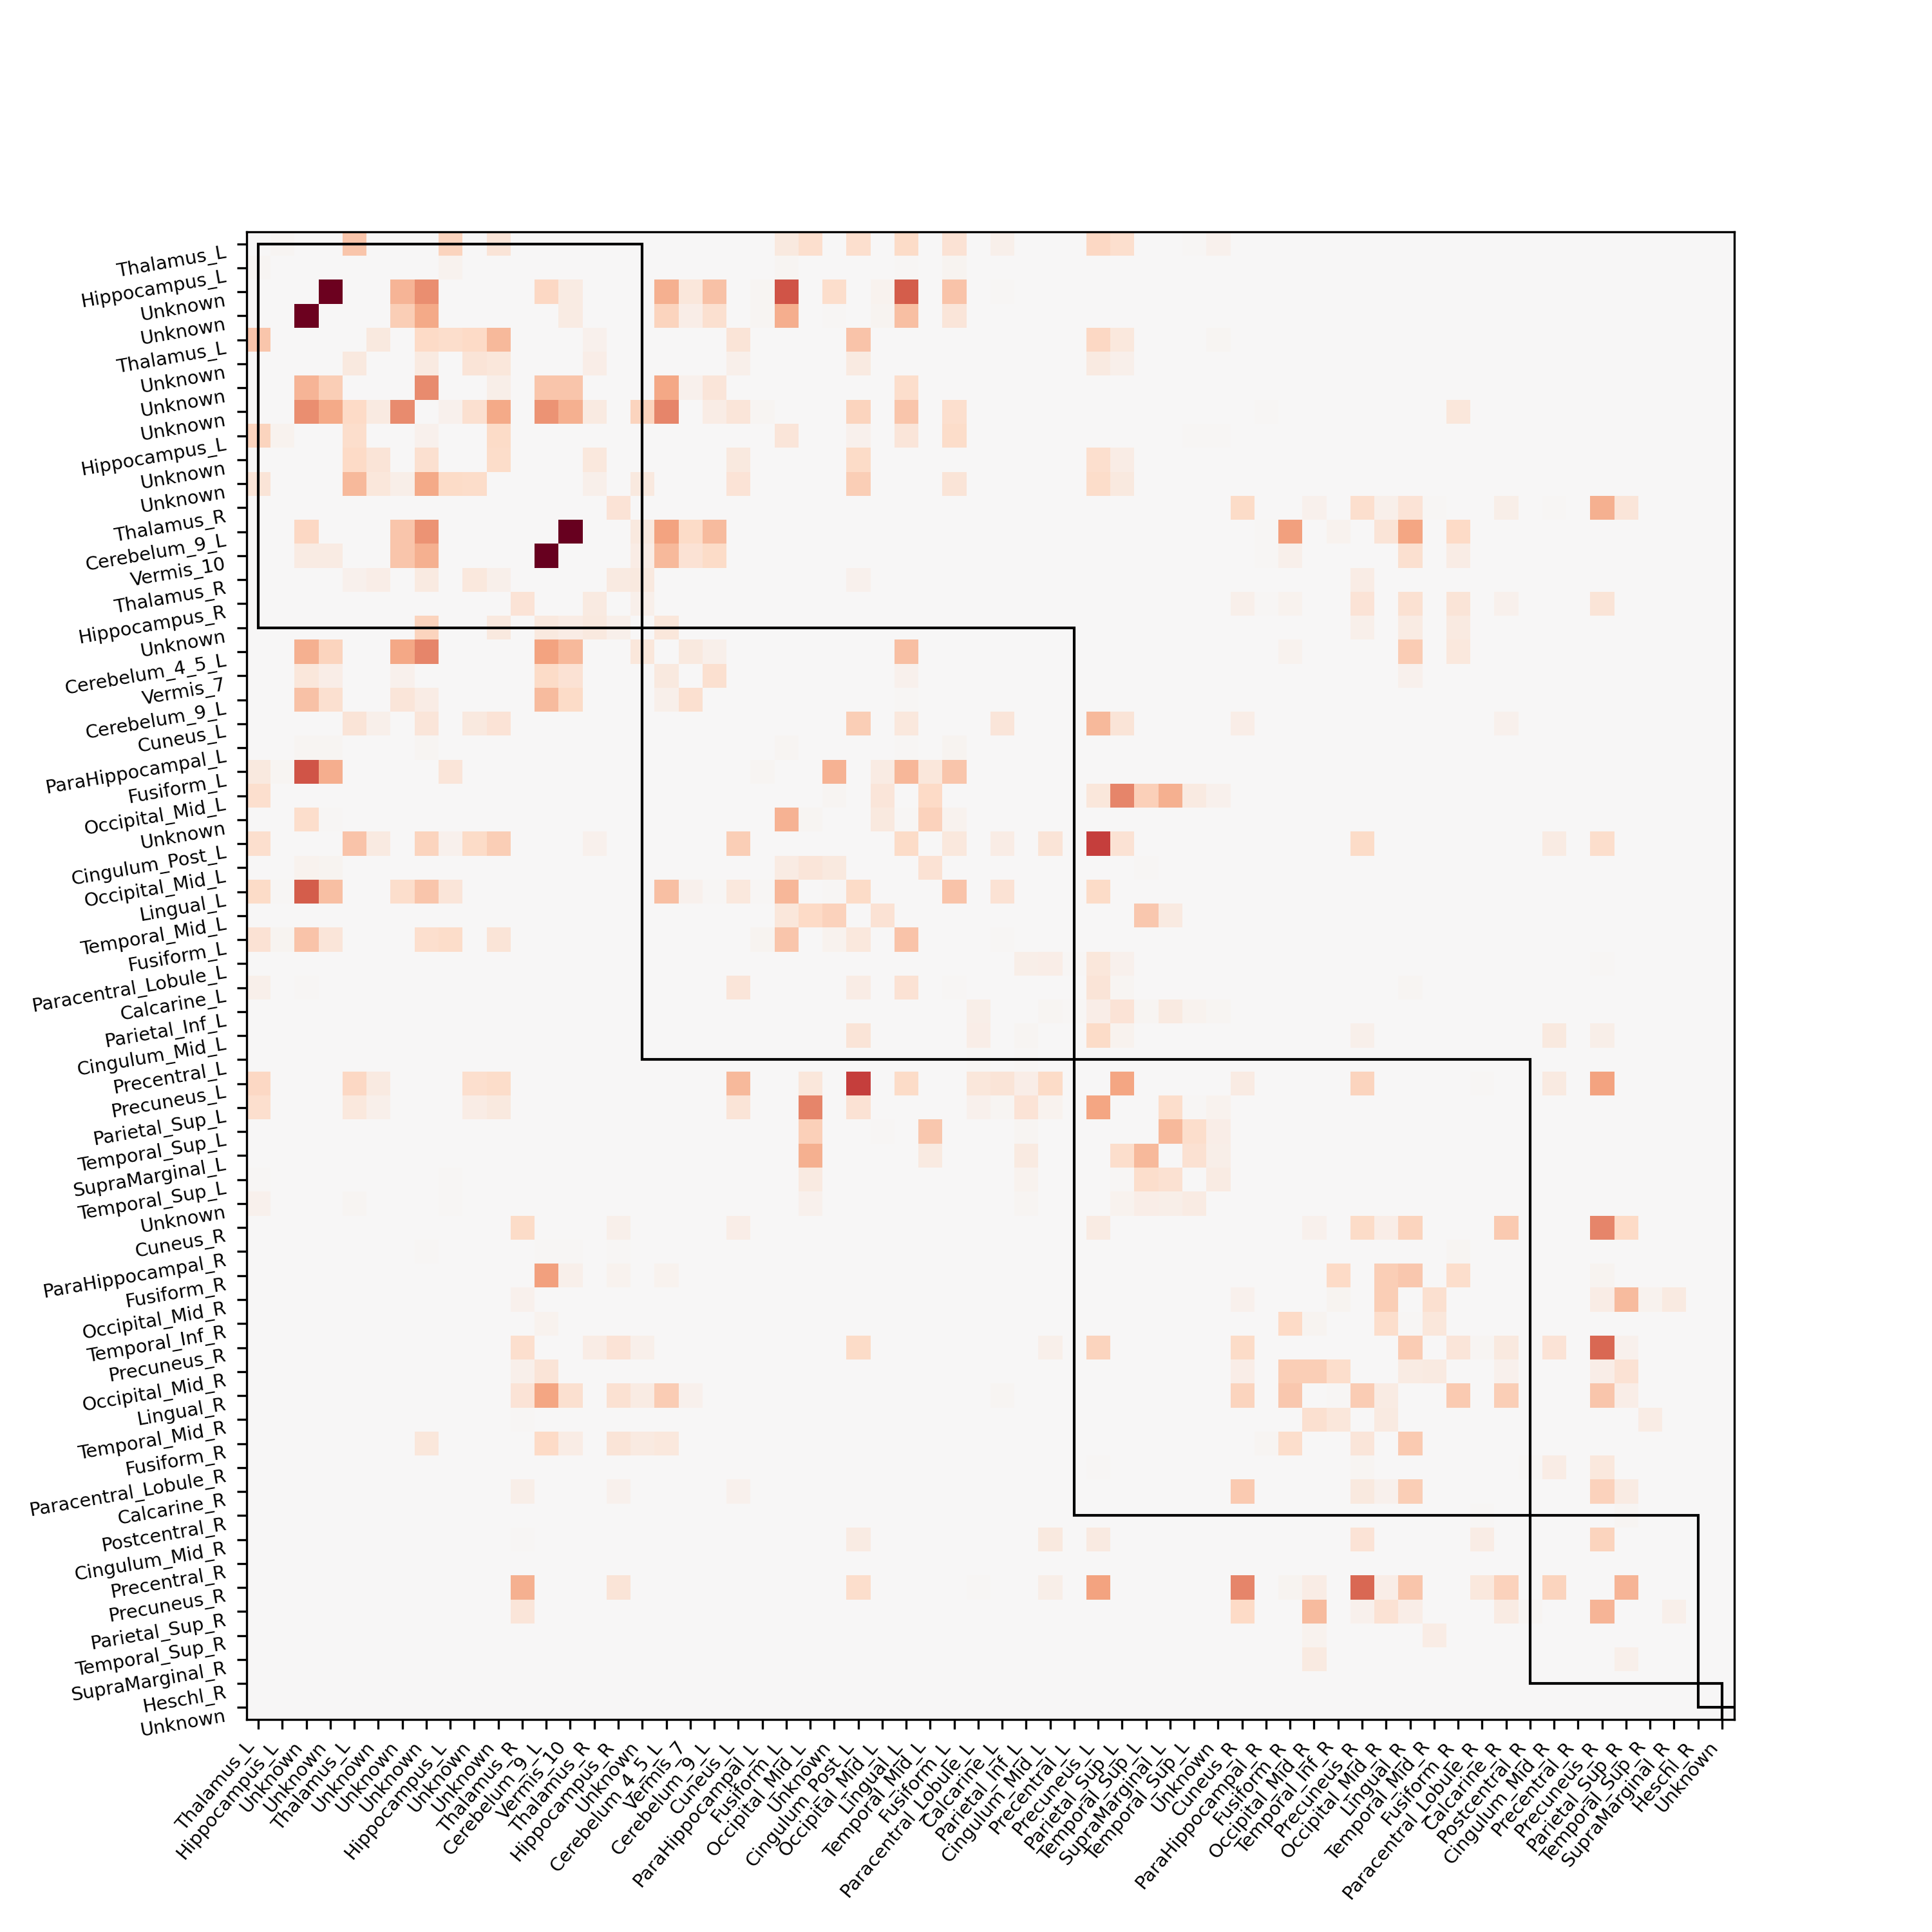

In [11]:
Image(filename=glob.glob('/Users/*/Downloads/.pynets/outputs/sub-OAS31172/ses-d0407/dwi/DesikanKlein2012/figures/OAS31172_d0407_1_modality-dwi_est-ten_nodetype-parc_samples-10000streams_tt-local_dg-det_ml-0_thr-0.2_adj_mat_comm.png')[0]) 

The above adjacency matrix depicts a single connectome estimate, with community affiliation. But we could also look at the mean connectome (i.e. across all 48 estimates) as well. Note that by default pynets only samples 10,000 streamlines found to successfully connect at least two parcellation regions after all tissue/waymask/minimum-length filtering. This keeps runtimes down to <60 minutes for the complete structural connectometry pipeline. Bear in mind, however, that across our ensemble sample considered collectively, we are **actually** sampling 10,000 x 48 = 500,000 streamlines.

In [20]:
import pickle
import glob
import numpy as np
from matplotlib import pyplot as plt
from nilearn.plotting import plot_matrix
from pynets.core.thresholding import standardize
labels_path = glob.glob('/Users/*/Downloads/.pynets/outputs/sub-OAS31172/ses-d0407/dwi/DesikanKlein2012/nodes/*labels.pkl')[0]

with open(labels_path, 'rb') as f:
    labels = pickle.load(f)
    
mats = [np.load(i) for i in glob.glob('/Users/*/Downloads/.pynets/outputs/sub-OAS31172/ses-d0407/dwi/DesikanKlein2012/graphs/*.npy')]

max_mat = standardize(np.max(mats, axis=0))


plot_matrix(
    mean_mat,
    figure=(10, 10),
    labels=labels,
    vmax=1,
    vmin=0,
    reorder="average",
    auto_fit=True,
    grid=False,
    colorbar=False,
    cmap='RdBu_r',
)
plt.show()

ValueError: Length of labels unequal to length of matrix.

As you can see, we get a much more information-rich graph. This graph, unlike the first, now represents a new *distribution* of connectomes, that, by virtue of its plurality of views, more exhaustively samples from the true *population* of networks in this individual that may exhibit connectivity, across the whole brain as a region of interest.

# Collecting Outputs
Now, we explored the outputs of our connectome ensemble visually, but let's take a closer look at the actual topological data. To do this, we run another workflow using the `pynets_collect` CLI.

In [ ]:
%%bash

dir=~/Downloads/.pynets
abs_dir=`echo "$(dirname $dir)"`
pynets_collect -basedir "$abs_dir"/.pynets/outputs